In [248]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt
from tools import *
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error as MSE

In [ ]:
# Features
# Span, Chord, Sweep, Tip (x2); weight, altitude, stability. 
# Interactions: later.

In [2]:
def getObs(n):
    obs = {}
    for i in range(n):
        try:
            df = pd.read_csv(f'rocket-results/{i}.csv')
        except:
            print('Missing', i)
        obs[i] = df
    return obs

In [3]:
tot = 0
count = 0
for i in range(400):
    try:
        df = pd.read_csv(f'rocket-results/{i}.csv')
    except:
        continue
    if 90 > df.max()['Time (sec)'] > 20:
        print(i)

In [4]:
df.max()['Altitude (ft)']

55933.92

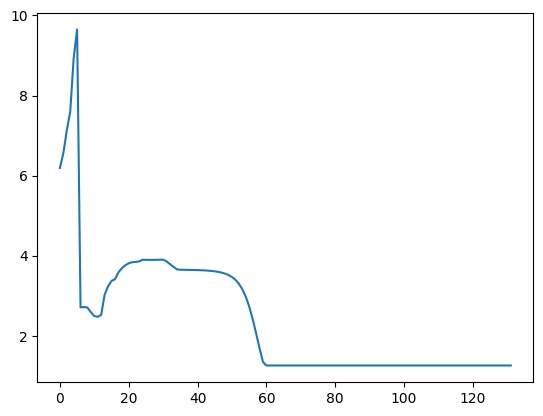

In [5]:
plt.plot(df['Time (sec)'], df['Stability Margin (cal)'])

In [6]:
# use time to classify stability

In [7]:
def initializeConfig():
    configs = {}
    with open('sample_list.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_100.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_200.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    with open('sample_list_300.pkl', 'rb') as f:
        d = pickle.load(f)
    configs.update(d)
    return configs

In [8]:
config = initializeConfig()
obs = getObs(400)

In [111]:
data = {}
for i in range(len(config)):
    data[i] = list(config[i]['S'].values()) + list(config[i]['B'].values())
    data[i].append(obs[i].max()['Altitude (ft)'])
    data[i].append(obs[i].mean()['Stability Margin (cal)'])
    data[i].append(obs[i].max()['Time (sec)'])
df = pd.DataFrame.from_dict(data, orient='index')
df

/var/folders/ff/y3gj2gld0zqfjtq_lhxz03t00000gn/T/ipykernel_19842/1048845639.py:5: FutureWarning:

The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.



,0,1,2,3,4,5,6,7,8,9,10
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645,0.004903,-5.121752,0.0100
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,77117.160000,1.278655,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,51216.000000,5.212006,125.0071
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081,0.004691,-2.489141,0.0100
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709,0.004818,-4.231226,0.0100
...,...,...,...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,70830.750000,1.673402,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,72485.310000,1.614970,150.9995
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172,0.000000,-1.734951,0.0000
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,73446.170000,0.853824,150.9995


In [112]:
df = df.rename(columns={0: "Schord", 1: "Sspan", 2: "Ssweep", 3: "Stip", 4: "Bchord", 
                        5: "Bspan", 6: "Bsweep", 7: "Btip", 8: "Altitude", 9: "Stability", 10: "Time"})
df['Schordspan'] = df['Schord'] * df['Sspan']
df['Schordsweep'] = df['Schord'] * df['Ssweep']
df['Schordtip'] = df['Schord'] * df['Stip']
df['Sspansweep'] = df['Sspan'] * df['Ssweep']
df['SSpantip'] = df['Sspan'] * df['Stip']
df['SSweeptip'] = df['Ssweep'] * df['Stip']

df['Bchordspan'] = df['Bchord'] * df['Bspan']
df['Bchordsweep'] = df['Bchord'] * df['Bsweep']
df['Bchordtip'] = df['Bchord'] * df['Btip']
df['Bspansweep'] = df['Bspan'] * df['Bsweep']
df['BSpantip'] = df['Bspan'] * df['Btip']
df['BSweeptip'] = df['Bsweep'] * df['Btip']
alt = df.pop("Altitude")
stab = df.pop("Stability")
time = df.pop("Time")

df.insert(len(df.columns), "Altitude", alt)
df.insert(len(df.columns), "Stability", stab)
df.insert(len(df.columns), "Time", time)
df

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Schordspan,Schordsweep,...,SSweeptip,Bchordspan,Bchordsweep,Bchordtip,Bspansweep,BSpantip,BSweeptip,Altitude,Stability,Time
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645,86.998844,59.755399,...,39.025144,14.302581,8.524515,16.024619,6.739826,12.669711,7.551304,0.004903,-5.121752,0.0100
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,14.181241,36.623926,...,30.475799,49.826002,28.051867,48.398181,22.556595,38.917130,21.910210,77117.160000,1.278655,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,45.139920,74.494323,...,69.178850,48.517110,42.439452,54.761021,53.116208,68.537590,59.951999,51216.000000,5.212006,125.0071
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081,51.614896,35.512459,...,53.549937,32.363803,32.433584,19.400628,32.620884,19.512664,19.554736,0.004691,-2.489141,0.0100
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709,12.297724,13.739946,...,30.448892,12.895807,46.945675,25.583158,25.346667,13.812727,50.283615,0.004818,-4.231226,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,8.729021,13.567499,...,47.680974,23.840776,49.293623,53.167952,30.650253,33.059270,68.353950,70830.750000,1.673402,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,20.505433,43.245446,...,50.628851,40.195478,29.783881,48.611503,24.333390,39.715531,29.428252,72485.310000,1.614970,150.9995
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172,62.264979,34.005123,...,17.574150,27.390888,36.613344,34.837657,54.726959,52.072793,69.605594,0.000000,-1.734951,0.0000
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,17.190049,20.815255,...,19.473850,16.587847,22.185683,24.114444,17.959727,19.521095,26.108803,73446.170000,0.853824,150.9995


In [207]:
features = ['Schord', 'Sspan', 'Ssweep', 'Stip', 'Bchord', 'Bspan', 'Bsweep', 'Btip', 'Time']

In [208]:
pca = PCA()
components = pca.fit_transform(df[features])

In [209]:
labels = {
    str(i): f"PC {i+1} ({var:.1f}%)"
    for i, var in enumerate(pca.explained_variance_ratio_ * 100)
}

In [210]:
labels

{'0': 'PC 1 (99.1%)',
 '1': 'PC 2 (0.2%)',
 '2': 'PC 3 (0.1%)',
 '3': 'PC 4 (0.1%)',
 '4': 'PC 5 (0.1%)',
 '5': 'PC 6 (0.1%)',
 '6': 'PC 7 (0.1%)',
 '7': 'PC 8 (0.1%)',
 '8': 'PC 9 (0.1%)'}

In [212]:
fig = px.scatter_matrix(
    components,
    labels=labels,
    dimensions = range(5),
    color=df['Stability']
)
fig.update_traces(diagonal_visible=False)
fig.show()

/Users/alanyu/opt/miniconda3/envs/rocket/lib/python3.9/site-packages/plotly/express/_core.py:279: FutureWarning:

iteritems is deprecated and will be removed in a future version. Use .items instead.



In [165]:
# Interaction terms help marginally. 
X_train, X_test = df.iloc[:200, :-15], df.iloc[200:, :-15]

# Stability level 1: cluster into flight time of 20 and 90.
Y_train, Y_test = df.iloc[:200, -1] > 90, df.iloc[200:, -1] > 90

In [166]:
reg = LR()
reg.fit(X_train, Y_train)
X_train

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709
...,...,...,...,...,...,...,...,...
195,8.606090,3.688308,7.214148,6.693368,4.975877,9.164133,8.728762,7.567946
196,6.254379,4.246962,3.976003,7.536317,2.002780,7.896346,2.316434,8.834220
197,5.757456,8.659987,5.726001,8.528360,3.922647,8.718497,5.971257,2.052773
198,5.011487,6.994906,6.587861,9.249341,4.271393,2.600021,6.502200,3.804956


In [167]:
sum(reg.predict(X_test) == Y_test)

176

In [168]:
sum(Y_test == False), sum(Y_test == True)

(99, 101)

In [169]:
print(sum(reg.predict(X_test.iloc[np.where(Y_test == False)]) == Y_test.iloc[np.where(Y_test == False)]) / sum(Y_test == False))
print(sum(reg.predict(X_test.iloc[np.where(Y_test == True)]) == Y_test.iloc[np.where(Y_test == True)]) / sum(Y_test == True))

0.9393939393939394
0.8217821782178217


In [35]:
def featurize(sustainer, booster):
    X = [sustainer['Chord'], sustainer['Span'], sustainer['Sweep'], sustainer['Tip'],
        booster['Chord'], booster['Span'], booster['Sweep'], booster['Tip']]
    items = ['Chord', 'Span', 'Sweep', 'Tip']
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            X.append(sustainer[items[i]]*sustainer[items[j]])
    for i in range(len(items)):
        for j in range(i+1, len(items)):
            X.append(booster[items[i]]*sustainer[items[j]])
    return X

In [67]:
t_sustainer = {'Chord': 5, 'Span': 6, 'Sweep': 6, 'Tip': 6}
t_booster = {'Chord': 7, 'Span': 3, 'Sweep': 4, 'Tip': 9}
#reg.predict_proba([featurize(t_sustainer, t_booster)])
reg.predict_proba([[]])

array([[1.06414339e-02, 9.89358566e-01],
       [9.10508838e-01, 8.94911619e-02],
       [9.49615346e-01, 5.03846540e-02],
       [2.80695615e-01, 7.19304385e-01],
       [5.00546717e-01, 4.99453283e-01],
       [9.99884257e-01, 1.15742635e-04],
       [4.98878956e-01, 5.01121044e-01],
       [9.99070563e-01, 9.29437231e-04],
       [2.73124456e-05, 9.99972688e-01],
       [9.94914025e-01, 5.08597495e-03],
       [9.99813352e-01, 1.86647748e-04],
       [9.99989417e-01, 1.05834913e-05],
       [1.17258157e-04, 9.99882742e-01],
       [4.07556148e-04, 9.99592444e-01],
       [1.52741094e-02, 9.84725891e-01],
       [9.98393794e-01, 1.60620646e-03],
       [1.65599190e-01, 8.34400810e-01],
       [7.11907031e-01, 2.88092969e-01],
       [9.80970208e-01, 1.90297918e-02],
       [9.71407640e-01, 2.85923602e-02],
       [9.15119173e-04, 9.99084881e-01],
       [3.09755118e-07, 9.99999690e-01],
       [9.96275127e-01, 3.72487318e-03],
       [3.74357159e-01, 6.25642841e-01],
       [5.869206

# Predicting Altitude

In [171]:
lr = LinearRegression()

In [342]:
filtered_df = df[df['Time'] > 90]
filtered_df
# Interaction terms help marginally. 
X_train, X_test = filtered_df.iloc[:100, :-3], filtered_df.iloc[100:, :-]

# Stability level 1: cluster into flight time of 20 and 90.
Y_train, Y_test = filtered_df.iloc[:100, -3], filtered_df.iloc[100:, -3]


lr.fit(X_train, Y_train)

TypeError: fit() got an unexpected keyword argument 'solver'

In [259]:
lr.score(X_train, Y_train)

0.9187972393740796

In [260]:
lr.coef_, lr.intercept_

(array([-6.12999056e+02, -9.19986146e+03,  2.63892604e+03, -7.10140817e+02,
        -2.25149430e+00,  3.60075681e+02,  6.86802013e+01, -2.48958963e+02,
         1.78108099e+02, -6.64857275e+01, -8.95722681e+01,  9.13549829e+01,
         1.98674552e+02, -5.14790170e+01, -1.43980548e+02,  2.02912222e+02,
         5.18650782e-01, -1.00161202e+02,  3.40413308e+01, -3.21281879e+01]),
 86132.78088254193)

In [269]:
X_test

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Schordspan,Schordsweep,Schordtip,Sspansweep,SSpantip,SSweeptip,Bchordspan,Bchordsweep,Bchordtip,Bspansweep,BSpantip,BSweeptip
212,5.259048,8.201739,7.418723,8.216527,2.640339,8.937041,9.653104,5.900797,43.133338,39.015416,43.211105,60.846430,67.389810,60.956132,23.596823,25.487472,15.580107,86.270193,52.735667,56.961008
213,5.556608,5.665979,2.141787,8.167383,6.534285,7.177163,3.075815,2.232603,31.483622,11.901069,45.382940,12.135320,46.276219,17.492793,46.897629,20.098251,14.588466,22.075626,16.023758,6.867075
214,7.736498,6.412773,6.981651,9.384999,7.258333,9.011802,2.222503,2.632106,49.612411,54.013528,72.607027,44.771744,60.183871,65.522782,65.410663,16.131670,19.104702,20.028762,23.720020,5.849865
215,6.513274,3.495698,8.171398,2.001211,8.004495,7.896190,6.976748,8.157834,22.768442,53.222557,13.034436,28.564742,6.995630,16.352691,63.205017,55.845350,65.299347,55.089731,64.415810,56.915156
217,9.498515,2.667657,2.510210,4.382181,4.978264,7.071330,5.616562,6.388213,25.338781,23.843264,41.624210,6.696379,11.690156,11.000193,35.202946,27.960729,31.802213,39.716562,45.173162,35.879796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,5.247843,7.799644,8.441005,9.658211,6.937770,7.882306,6.353957,9.196173,40.931306,44.297067,50.684773,65.836827,75.330601,81.524999,54.685626,44.082290,63.800932,50.083829,72.487046,58.432082
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,8.729021,13.567499,23.911336,17.406313,30.676856,47.680974,23.840776,49.293623,53.167952,30.650253,33.059270,68.353950
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,20.505433,43.245446,71.253073,14.570130,24.006378,50.628851,40.195478,29.783881,48.611503,24.333390,39.715531,29.428252
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,17.190049,20.815255,47.085787,7.109501,16.082265,19.473850,16.587847,22.185683,24.114444,17.959727,19.521095,26.108803


In [338]:
ridge = Ridge(alpha=20)
ridge.fit(X_train, Y_train)
lasso = Lasso(alpha=400)
lasso.fit(X_train, Y_train)

Lasso(alpha=400)

In [339]:
np.sqrt([MSE(Y_train, lasso.predict(X_train)), MSE(Y_train, ridge.predict(X_train)), MSE(Y_train, lr.predict(X_train))])

array([4199.63589441, 4543.75624932, 4028.97177907])

In [340]:
np.sqrt([MSE(Y_test, lasso.predict(X_test)), MSE(Y_test, ridge.predict(X_test)), MSE(Y_test, lr.predict(X_test))])

array([5536.88032916, 5592.75384774, 6067.4794611 ])

In [223]:
fit = sm.OLS.from_formula('Stability ~ Schord + Sspan + Ssweep + Stip + Bchord + Bspan + Bsweep + Btip + Time',filtered_df.iloc[:100]).fit(cov_type = 'HC1')

In [224]:
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Stability   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     437.0
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           3.14e-70
Time:                        15:57:01   Log-Likelihood:                -5.7625
No. Observations:                 100   AIC:                             31.52
Df Residuals:                      90   BIC:                             57.58
Df Model:                           9                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     17.1550      1.045     16.422      0.000      15.108      19.202
Schord         0.0576      0.011      5.346      0.000       0.036       0.079
Sspan         -0.2578      0.050     -5.113      0.000      -0.357      -0.159
Ssweep         0.3231      0.024     13.679      0.000       0.277       0.369
Stip           0.0869      0.015      5.893      0.000       0.058       0.116
Bchord        -0.0345      0.013     -2.744      0.006      -0.059      -0.010
Bspan         -0.0351      0.025     -1.428      0.153      -0.083       0.013
Bsweep         0.0209      0.011      1.931      0.053      -0.000       0.042
Btip           0.0213      0.012      1.836      0.066      -0.001       0.044
Time          -0.1162      0.006    -19.450      0.000      -0.128      -0.104
==============================================================================
Omnibus:                       19.832   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.325
Skew:                          -0.926   Prob(JB):                     7.07e-07
Kurtosis:                       4.835   Cond. No.                     4.51e+03
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
[2] The condition number is large, 4.51e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [506]:
alt_fit = sm.OLS.from_formula('Altitude ~ Schord + Sspan + Ssweep + Stip + Bchord + Bspan + Bsweep + Btip',
                              filtered_df.iloc[:100]).fit(cov_type = 'HC1')
alt_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Altitude   R-squared:                       0.904
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     75.57
Date:                Fri, 09 Dec 2022   Prob (F-statistic):           7.63e-37
Time:                        16:57:22   Log-Likelihood:                -980.34
No. Observations:                 100   AIC:                             1979.
Df Residuals:                      91   BIC:                             2002.
Df Model:                           8                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.347e+04   3861.066     21.617      0.000    7.59e+04     9.1e+04
Schord      -589.8895    179.784     -3.281      0.001    -942.259    -237.520
Sspan      -6334.7204    296.954    -21.332      0.000   -6916.740   -5752.701
Ssweep      2344.3143    200.089     11.716      0.000    1952.147    2736.481
Stip        -476.6520    195.704     -2.436      0.015    -860.225     -93.079
Bchord       158.4496    188.761      0.839      0.401    -211.515     528.415
Bspan      -1155.6293    385.905     -2.995      0.003   -1911.988    -399.270
Bsweep       433.5021    209.532      2.069      0.039      22.826     844.178
Btip        -217.6456    180.907     -1.203      0.229    -572.216     136.925
==============================================================================
Omnibus:                        9.668   Durbin-Watson:                   1.868
Prob(Omnibus):                  0.008   Jarque-Bera (JB):               10.448
Skew:                           0.791   Prob(JB):                      0.00539
Kurtosis:                       2.928   Cond. No.                         143.
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [507]:
alt_fit = sm.OLS.from_formula('Altitude ~ Schord + Sspan + Ssweep + Stip + Bchord + Bspan + Bsweep + Btip',
                              filtered_df.iloc[:100]).fit_regularized(L1_wt=0)

In [537]:
sm.add_constant(filtered_df)
sm.OLS(filtered_df.iloc[:100, -3], filtered_df.iloc[:100, :-3]).fit().summary()

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Schordspan,Schordsweep,...,SSweeptip,Bchordspan,Bchordsweep,Bchordtip,Bspansweep,BSpantip,BSweeptip,Altitude,Stability,Time
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,14.181241,36.623926,...,30.475799,49.826002,28.051867,48.398181,22.556595,38.917130,21.910210,77117.16,1.278655,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,45.139920,74.494323,...,69.178850,48.517110,42.439452,54.761021,53.116208,68.537590,59.951999,51216.00,5.212006,125.0071
5,8.562160,4.337768,7.930397,4.372560,9.417980,8.246008,2.728282,6.326085,37.140668,67.901332,...,34.676133,77.660732,25.694900,59.578937,22.497430,52.164942,17.259340,54082.50,4.485508,129.0079
6,8.703811,2.188438,9.143090,2.635864,9.087634,8.094306,6.826608,3.754130,19.047753,79.579730,...,24.099946,73.558093,62.037714,34.116158,55.256655,30.387077,25.627973,78784.51,0.613785,156.9962
8,8.074672,3.479253,5.061755,2.201202,8.430403,6.003352,2.080965,3.394916,28.093824,40.872014,...,11.141944,50.610675,17.543371,28.620512,12.492762,20.380874,7.064700,59576.45,2.920013,136.0078
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393,5.247843,7.799644,8.441005,9.658211,6.937770,7.882306,6.353957,9.196173,40.931306,44.297067,...,81.524999,54.685626,44.082290,63.800932,50.083829,72.487046,58.432082,39893.78,5.851534,111.0041
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,8.729021,13.567499,...,47.680974,23.840776,49.293623,53.167952,30.650253,33.059270,68.353950,70830.75,1.673402,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,20.505433,43.245446,...,50.628851,40.195478,29.783881,48.611503,24.333390,39.715531,29.428252,72485.31,1.614970,150.9995
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,17.190049,20.815255,...,19.473850,16.587847,22.185683,24.114444,17.959727,19.521095,26.108803,73446.17,0.853824,150.9995


# NN Approach

In [518]:
# Only on the filtered data. 
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectFromModel
use = ['Sspan', 'Ssweep', 'Stip', 'Bchord', 'Bspan', 'Bsweep', 'Btip', 'Schordsweep', 'Schordtip',
       'SSweeptip', 'Bchordspan', 'Bspansweep']
X_train

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Schordspan,Schordsweep,Schordtip,Sspansweep,SSpantip,SSweeptip,Bchordspan,Bchordsweep,Bchordtip,Bspansweep,BSpantip,BSweeptip
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,14.181241,36.623926,21.228935,20.358282,11.800610,30.475799,49.826002,28.051867,48.398181,22.556595,38.917130,21.910210
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,45.139920,74.494323,71.850228,43.461626,41.919003,69.178850,48.517110,42.439452,54.761021,53.116208,68.537590,59.951999
5,8.562160,4.337768,7.930397,4.372560,9.417980,8.246008,2.728282,6.326085,37.140668,67.901332,37.438556,34.400225,18.967150,34.676133,77.660732,25.694900,59.578937,22.497430,52.164942,17.259340
6,8.703811,2.188438,9.143090,2.635864,9.087634,8.094306,6.826608,3.754130,19.047753,79.579730,22.942065,20.009089,5.768427,24.099946,73.558093,62.037714,34.116158,55.256655,30.387077,25.627973
8,8.074672,3.479253,5.061755,2.201202,8.430403,6.003352,2.080965,3.394916,28.093824,40.872014,17.773981,17.611125,7.658536,11.141944,50.610675,17.543371,28.620512,12.492762,20.380874,7.064700
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,6.254379,4.246962,3.976003,7.536317,2.002780,7.896346,2.316434,8.834220,26.562108,24.867430,47.134985,16.885932,32.006450,29.964420,15.814645,4.639308,17.693000,18.291363,69.758057,20.463885
200,3.385068,3.752941,9.547858,2.412589,4.683486,4.715880,3.874262,6.656793,12.703961,32.320153,8.166778,35.832543,9.054302,23.035054,22.086759,18.145051,31.176998,18.270556,31.392641,25.790162
207,5.775451,2.560324,2.846877,5.725483,8.179973,7.818894,6.691936,5.680151,14.787024,16.441996,33.067247,7.288926,14.659090,16.299745,63.958343,54.739853,46.463486,52.323535,44.412503,38.011208
208,2.593480,5.827054,3.917101,4.409799,7.128560,7.861199,2.975546,9.198286,15.112349,10.158922,11.436725,22.825158,25.696138,17.273626,56.039028,21.211358,65.570528,23.391362,72.309558,27.369924


In [538]:
regr = MLPRegressor(random_state=1, max_iter = 1000,
                   hidden_layer_sizes = np.array([30,30,15,10])).fit(X_train[use], Y_train)

In [539]:
regr.score(X_train[use], Y_train)

-1.3077206684866285

In [533]:
np.sqrt(regr.loss_)

15189.112694525851

In [489]:
np.sqrt(MSE(regr.predict(X_test.iloc[:,:-2]), Y_test))

3139.3506400667725

In [477]:
regr.predict([df.iloc[395, :-3]])

/Users/alanyu/opt/miniconda3/envs/rocket/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning:

X does not have valid feature names, but MLPRegressor was fitted with feature names



ValueError: X has 20 features, but MLPRegressor is expecting 17 features as input.

In [404]:
df

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip,Schordspan,Schordsweep,...,SSweeptip,Bchordspan,Bchordsweep,Bchordtip,Bspansweep,BSpantip,BSweeptip,Altitude,Stability,Time
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645,86.998844,59.755399,...,39.025144,14.302581,8.524515,16.024619,6.739826,12.669711,7.551304,0.004903,-5.121752,0.0100
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326,14.181241,36.623926,...,30.475799,49.826002,28.051867,48.398181,22.556595,38.917130,21.910210,77117.160000,1.278655,154.9973
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342,45.139920,74.494323,...,69.178850,48.517110,42.439452,54.761021,53.116208,68.537590,59.951999,51216.000000,5.212006,125.0071
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081,51.614896,35.512459,...,53.549937,32.363803,32.433584,19.400628,32.620884,19.512664,19.554736,0.004691,-2.489141,0.0100
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709,12.297724,13.739946,...,30.448892,12.895807,46.945675,25.583158,25.346667,13.812727,50.283615,0.004818,-4.231226,0.0100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406,8.729021,13.567499,...,47.680974,23.840776,49.293623,53.167952,30.650253,33.059270,68.353950,70830.750000,1.673402,149.0006
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445,20.505433,43.245446,...,50.628851,40.195478,29.783881,48.611503,24.333390,39.715531,29.428252,72485.310000,1.614970,150.9995
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172,62.264979,34.005123,...,17.574150,27.390888,36.613344,34.837657,54.726959,52.072793,69.605594,0.000000,-1.734951,0.0000
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160,17.190049,20.815255,...,19.473850,16.587847,22.185683,24.114444,17.959727,19.521095,26.108803,73446.170000,0.853824,150.9995


In [417]:
regr = MLPRegressor(random_state=1, max_iter = 10000,
                   hidden_layer_sizes = np.array([35,35,35,30,20,10])).fit(df.iloc[:300, :8], df.iloc[:300, -3])
regr.score(df.iloc[:300, :8], df.iloc[:300, -3])

0.7430797995122553

In [418]:
np.sqrt(MSE(regr.predict(df.iloc[300:,:8]), df.iloc[300:, -3]))

17828.376739360952

In [505]:
X = df.iloc[:,:-3]
Y = df.iloc[:,-3]
sfm_selector = SelectFromModel(estimator=regr)
sfm_selector.fit(X, Y)
X.columns[sfm_selector.get_support()]

ValueError: when `importance_getter=='auto'`, the underlying estimator MLPRegressor should have `coef_` or `feature_importances_` attribute. Either pass a fitted estimator to feature selector or call fit before calling transform.

In [540]:
from sklearn.preprocessing import PolynomialFeatures

In [588]:
poly = PolynomialFeatures(2)
df.iloc[:, :8]

,Schord,Sspan,Ssweep,Stip,Bchord,Bspan,Bsweep,Btip
0,9.465233,9.191411,6.313146,6.181568,4.253219,3.362766,2.004250,3.767645
1,5.050903,2.807665,7.250966,4.202998,7.871765,6.329711,3.563606,6.148326
2,8.796076,5.131824,8.469040,8.168441,6.226139,7.792487,6.816335,8.795342
3,5.590219,9.233072,6.352605,8.429602,5.672564,5.705322,5.717624,3.420081
4,2.916229,4.216994,4.711545,6.462613,4.887217,2.638681,9.605809,5.234709
...,...,...,...,...,...,...,...,...
395,2.608430,3.346465,5.201403,9.166944,6.192108,3.850187,7.960717,8.586406
396,7.801407,2.628427,5.543288,9.133362,7.014197,5.730589,4.246228,6.930445
397,7.364198,8.455093,4.617628,3.805883,4.280772,6.398586,8.552977,8.138172
398,7.094305,2.423077,2.934079,6.637124,4.526698,3.664447,4.901074,5.327160


In [589]:
lr.fit(poly.fit_transform(filtered_df.iloc[:100,:8]), filtered_df.iloc[:100, -3])

LinearRegression()

In [590]:
lr.score(poly.fit_transform(filtered_df.iloc[:,:8]), filtered_df.iloc[:, -3])

0.9876736902837542

In [591]:
np.sqrt(MSE(filtered_df.iloc[100:, -3], lr.predict(poly.fit_transform(filtered_df.iloc[100:,:8]))))

2150.210126002314

In [596]:
# Quadratic best1
filtered_df.iloc[0]

Schord             5.050903
Sspan              2.807665
Ssweep             7.250966
Stip               4.202998
Bchord             7.871765
Bspan              6.329711
Bsweep             3.563606
Btip               6.148326
Schordspan        14.181241
Schordsweep       36.623926
Schordtip         21.228935
Sspansweep        20.358282
SSpantip          11.800610
SSweeptip         30.475799
Bchordspan        49.826002
Bchordsweep       28.051867
Bchordtip         48.398181
Bspansweep        22.556595
BSpantip          38.917130
BSweeptip         21.910210
Altitude       77117.160000
Stability          1.278655
Time             154.997300
Name: 1, dtype: float64